In [2]:
import numpy as np

in_dir = r"C:\Users\stani\Desktop\chuj\exercises\ex1b-PCA\data"
txt_name = "\irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [3]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


In [4]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [5]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)

In [6]:
import numpy as np

# Assume the data matrix x is already defined from the previous exercise
# Create vectors for each feature
sep_l = x[:, 0]  # Sepal Length
sep_w = x[:, 1]  # Sepal Width
pet_l = x[:, 2]  # Petal Length
pet_w = x[:, 3]  # Petal Width

# Compute the variance for each feature
var_sep_l = sep_l.var(ddof=1)  # Variance of Sepal Length
var_sep_w = sep_w.var(ddof=1)  # Variance of Sepal Width
var_pet_l = pet_l.var(ddof=1)  # Variance of Petal Length
var_pet_w = pet_w.var(ddof=1)  # Variance of Petal Width

# Print the variances
print(f"Variance of Sepal Length: {var_sep_l:.2f}")
print(f"Variance of Sepal Width: {var_sep_w:.2f}")
print(f"Variance of Petal Length: {var_pet_l:.2f}")
print(f"Variance of Petal Width: {var_pet_w:.2f}")


Variance of Sepal Length: 0.12
Variance of Sepal Width: 0.14
Variance of Petal Length: 0.03
Variance of Petal Width: 0.01


In [7]:
import numpy as np

# Assume the data matrix x is already defined from the previous exercise
# Create vectors for each feature
sep_l = x[:, 0]  # Sepal Length
sep_w = x[:, 1]  # Sepal Width
pet_l = x[:, 2]  # Petal Length

# Compute the means of the features
mean_sep_l = np.mean(sep_l)
mean_sep_w = np.mean(sep_w)
mean_pet_l = np.mean(pet_l)

# Compute covariance between Sepal Length and Sepal Width
cov_sep_l_sep_w = np.sum((sep_l - mean_sep_l) * (sep_w - mean_sep_w)) / (len(sep_l) - 1)

# Compute covariance between Sepal Length and Petal Length
cov_sep_l_pet_l = np.sum((sep_l - mean_sep_l) * (pet_l - mean_pet_l)) / (len(sep_l) - 1)

# Print the covariance results
print(f"Covariance between Sepal Length and Sepal Width: {cov_sep_l_sep_w:.4f}")
print(f"Covariance between Sepal Length and Petal Length: {cov_sep_l_pet_l:.4f}")


Covariance between Sepal Length and Sepal Width: 0.0992
Covariance between Sepal Length and Petal Length: 0.0164


<Figure size 640x480 with 0 Axes>

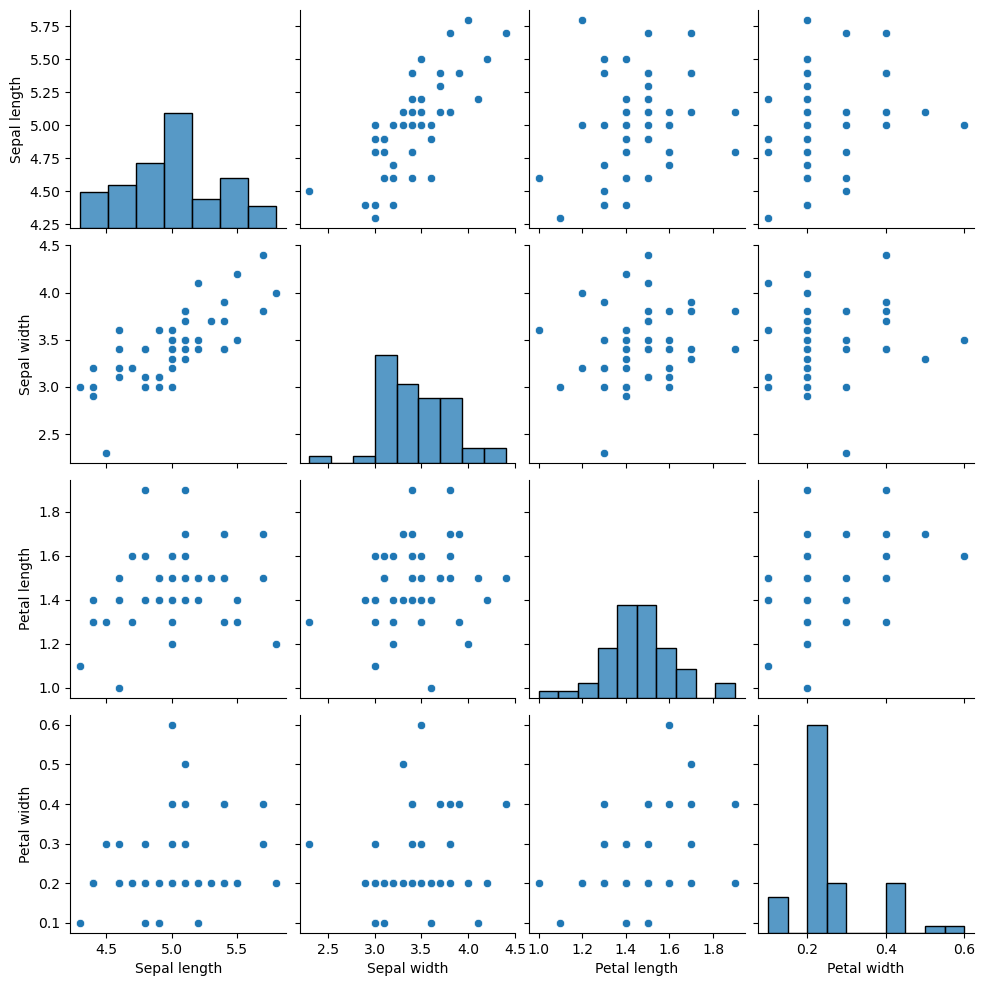

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

<Figure size 1000x800 with 0 Axes>

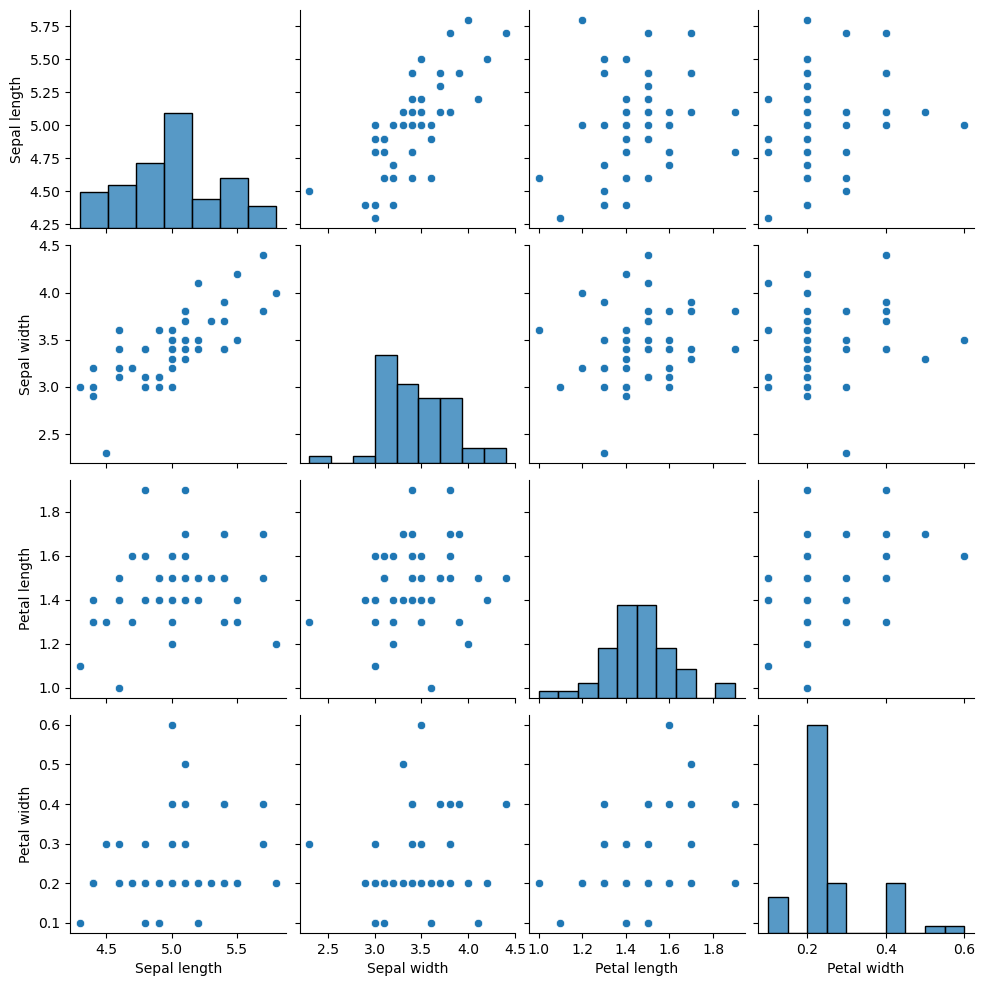

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data matrix 'x' is already defined from previous exercises
# Transform the data into a Pandas DataFrame
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])

# Create a pairplot to visualize the relationships
plt.figure(figsize=(10, 8))  # Create a figure with a specific size
sns.pairplot(d)
plt.show()


In [12]:
import numpy as np

# Assuming `x` is already defined as in the previous exercises
# Compute the mean of each feature (column)
mn = np.mean(x, axis=0)

# Subtract the mean from the data (center the data)
data = x - mn


In [13]:
# Compute the covariance matrix manually
N = data.shape[0]  # Number of observations
cov_matrix_manual = np.matmul(data.T, data) / (N - 1)
print("Covariance Matrix (Manual Calculation):\n", cov_matrix_manual)


Covariance Matrix (Manual Calculation):
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


In [15]:
# Check if both covariance matrices are the same
if np.allclose(cov_matrix_manual, cov_matrix_numpy):
    print("\nThe two covariance matrices are the same.")
else:
    print("\nThe two covariance matrices are different.")



The two covariance matrices are the same.


In [17]:

# Assume `cov_matrix_numpy` is the covariance matrix from Exercise 5
cov_matrix_numpy = np.cov(data, rowvar=False)  # Recompute to ensure it's defined

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_numpy)

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors (Principal Components):\n", eigenvectors)


Eigenvalues:
 [0.23645569 0.03691873 0.0267964  0.00903326]

Eigenvectors (Principal Components):
 [[-0.6690784  -0.59788401  0.43996277 -0.03607712]
 [-0.73414783  0.62067342 -0.27460747 -0.01955027]
 [-0.0965439  -0.49005559 -0.8324495  -0.23990129]
 [-0.06356359 -0.13093791 -0.19506751  0.96992969]]


In [18]:
# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors (Principal Components):\n", sorted_eigenvectors)



Sorted Eigenvalues:
 [0.23645569 0.03691873 0.0267964  0.00903326]

Sorted Eigenvectors (Principal Components):
 [[-0.6690784  -0.59788401  0.43996277 -0.03607712]
 [-0.73414783  0.62067342 -0.27460747 -0.01955027]
 [-0.0965439  -0.49005559 -0.8324495  -0.23990129]
 [-0.06356359 -0.13093791 -0.19506751  0.96992969]]


In [19]:
import matplotlib.pyplot as plt

# Assuming `eigenvalues` contains the eigenvalues obtained from np.linalg.eig
# Compute the normalized variance (percentage of total variance)
explained_variance_ratio = eigenvalues / eigenvalues.sum() * 100

print("Explained variance by each component (%):", explained_variance_ratio)


Explained variance by each component (%): [76.47237023 11.93992401  8.66624997  2.92145579]


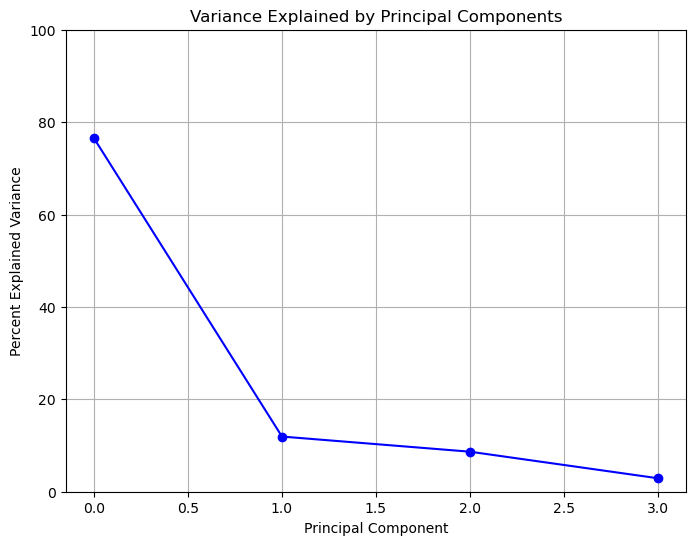

In [21]:
# Plot the explained variance for each principal component
plt.figure(figsize=(8, 6))
plt.plot(explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percent Explained Variance')
plt.ylim([0, 100])
plt.grid(True)
plt.show()


In [22]:
# Assuming `x` is already your data matrix of shape (50, 4)
# Subtract the mean
x_centered = x - np.mean(x, axis=0)


In [26]:
from sklearn import decomposition

# Create a PCA object
pca = decomposition.PCA(n_components=4)  # You can choose the number of components to keep

# Fit the PCA model on the data
pca.fit(x_centered)

# Transform the data into the principal component space
x_pca = pca.transform(x_centered)

# Print the results
print("Explained variance by each component:", pca.explained_variance_)
print("Explained variance ratio (percentage):", pca.explained_variance_ratio_ * 100)
print("Principal components (eigenvectors):\n", pca.components_)


Explained variance by each component: [0.23645569 0.03691873 0.0267964  0.00903326]
Explained variance ratio (percentage): [76.47237023 11.93992401  8.66624997  2.92145579]
Principal components (eigenvectors):
 [[ 0.6690784   0.73414783  0.0965439   0.06356359]
 [-0.59788401  0.62067342 -0.49005559 -0.13093791]
 [-0.43996277  0.27460747  0.8324495   0.19506751]
 [-0.03607712 -0.01955027 -0.23990129  0.96992969]]


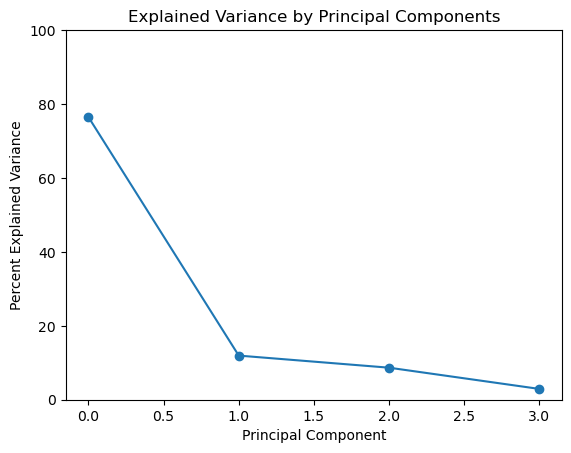

In [27]:
# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_ * 100, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Percent Explained Variance')
plt.ylim([0, 100])
plt.title('Explained Variance by Principal Components')
plt.show()


In [28]:
# Create a PCA object
pca = decomposition.PCA()

# Fit the PCA model to the data
pca.fit(x)

# Extract the eigenvalues (explained variance)
values_pca = pca.explained_variance_

# Extract the explained variance ratio (percentage of variance explained by each component)
exp_var_ratio = pca.explained_variance_ratio_

# Extract the eigenvectors (principal components)
vectors_pca = pca.components_

# Transform the original data to the principal component space
data_transform = pca.transform(x)

# Print the results
print("Explained variance by each component:", values_pca)
print("Explained variance ratio (percentage):", exp_var_ratio * 100)
print("Principal components (eigenvectors):\n", vectors_pca)
print("Transformed data (first 5 rows):\n", data_transform[:5])


Explained variance by each component: [0.23645569 0.03691873 0.0267964  0.00903326]
Explained variance ratio (percentage): [76.47237023 11.93992401  8.66624997  2.92145579]
Principal components (eigenvectors):
 [[ 0.6690784   0.73414783  0.0965439   0.06356359]
 [-0.59788401  0.62067342 -0.49005559 -0.13093791]
 [-0.43996277  0.27460747  0.8324495   0.19506751]
 [-0.03607712 -0.01955027 -0.23990129  0.96992969]]
Transformed data (first 5 rows):
 [[ 0.10684237  0.02489398 -0.08216974 -0.03454175]
 [-0.39404723 -0.16586593 -0.13148092 -0.01755119]
 [-0.39068773  0.12685112 -0.07181182  0.0097443 ]
 [-0.51170158  0.02656106  0.11121361 -0.03267321]
 [ 0.11334931  0.14674972 -0.01071271 -0.03288907]]
